# Pyber Data Analysis

## Observed Trends by City Type: 

### Urban Cities

Urban cities account for about 63% of the total revenue from rides, almost 70% of the total number of rides, and over 80% of the total number of drivers for rides. 
Urban cities tend to have the largest number of drivers and total rides per city, with cheaper rides on average than Rural or Suburban cities. 

### Rural Cities

Rural cities account for least percent (7%) of the total revenue from rides, only 5% of the total number of rides, and barely 3% of the total number of drivers.
Rural cities have the lowest drivers and total rides per city, with slightly more expensive rides than Suburban or Urban cities on average. 

### Suburban Cities

Suburban cities account for about 30% of the total renue from rides, about 25% of the total number of rides, and around 17% of the total number of drivers. 
Suburban cities exist in between rural and urban in number of drivers, number of rides, and average ride cost per city. 

------------------------------------------------------------------------------------------------------

### Initial Data Table

In [2]:
%matplotlib inline

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# read city and ride csv data files
cityDf = pd.read_csv("data/city_data.csv")
rideDf = pd.read_csv("data/ride_data.csv")
#cityDf.head(50)
#cityDf.shape
#rideDf.head(50)
#rideDf.shape

# merge into a single dataset
cityRideDf = pd.merge(rideDf, cityDf, on='city')

# Display the data table for preview
cityRideDf.head(5)

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


### Bubble Plot of Ride Sharing Data

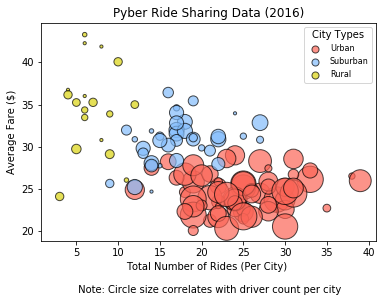

In [5]:
# use merged dataframe to calculate values for x and y axis of final chart
# while maintaining city type and city name
ridesPerCity = pd.DataFrame(cityRideDf.groupby(['type', 'city'])['ride_id'].count())
avgFare = pd.DataFrame(cityRideDf.groupby(['type', 'city'])['fare'].mean())
# calculate total drivers per city to to use later for size of bubble on final chart
totalDrivers = pd.DataFrame(cityRideDf.groupby(['type', 'city'])['driver_count'].mean())
# merge x and y values on type and city
mergedDf = pd.merge(ridesPerCity, avgFare, on=['type', 'city'])
# merge total drivers into newly merged x and y value dataframe, stil on type and city
mergedDf2 = pd.merge(mergedDf, totalDrivers, on=['type', 'city'])

# isolate data by urban city type using .loc and calculate urban values
uRidesPerCity = mergedDf2.loc['Urban','ride_id']
uAvgFare = mergedDf2.loc['Urban','fare']
uTotalDrivers = mergedDf2.loc['Urban','driver_count']
# isolate data by suburban city type using .loc and calculate suburban values
sRidesPerCity = mergedDf2.loc['Suburban','ride_id']
sAvgFare = mergedDf2.loc['Suburban','fare']
sTotalDrivers = mergedDf2.loc['Suburban','driver_count']
# isolate data by rural city type using .loc and calculate rural values
rRidesPerCity = mergedDf2.loc['Rural','ride_id']
rAvgFare = mergedDf2.loc['Rural','fare']
rTotalDrivers = mergedDf2.loc['Rural','driver_count']

# Build bubble plot and incorporate other properties - - look at activity 5:2:1
# bubble plot reference: https://python-graph-gallery.com/272-map-a-color-to-bubble-plot/
# color reference: https://plot.ly/~ChristinaChung/96/cherry-red-silver-white-verdigris-dove-colored-lilac-colored-coffee-colored-gray/#plot
uSize = uTotalDrivers*10
sSize = sTotalDrivers*10
rSize = rTotalDrivers*10
plt.title("Pyber Ride Sharing Data (2016)")
# Incorporate a text label regarding circle size - - below x-axis 
# label reference: https://matplotlib.org/tutorials/text/text_intro.html
plt.xlabel("Total Number of Rides (Per City) \n \n Note: Circle size correlates with driver count per city")
plt.ylabel("Average Fare ($)")
# create scatterplot for each ciy type
uScatter = plt.scatter(uRidesPerCity, uAvgFare, c="#fb6557", alpha=0.7, s=uSize, edgecolors="black", linewidth=1, label='Urban')
sScatter = plt.scatter(sRidesPerCity, sAvgFare, c="#83bdfc", alpha=0.7, s=sSize, edgecolors="black", linewidth=1, label='Suburban')
rScatter = plt.scatter(rRidesPerCity, rAvgFare, c="#dbd310", alpha=0.7, s=rSize, edgecolors="black", linewidth=1, label='Rural')
# Create a legend - - - look at activity 5:2:7
# set legend handle sizes: https://github.com/pandas-dev/pandas/issues/16827
# adjust legend font size: https://stackoverflow.com/questions/7125009/how-to-change-legend-size-with-matplotlib-pyplot
lgd = plt.legend(handles=[uScatter, sScatter, rScatter], prop={'size': 8}, loc="best", title='City Types') 
for handle in lgd.legendHandles:
    handle.set_sizes([50.0])

# Save Figure - - have to save instead of show - https://chartio.com/resources/tutorials/how-to-save-a-plot-to-a-file-using-matplotlib/
plt.savefig('pyberBubble.png', bbox_inches='tight')

### Total Fares by City Type

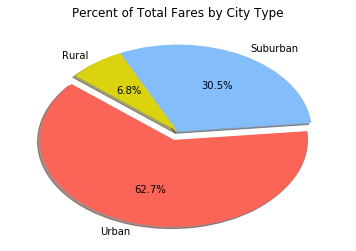

In [61]:
# use initial data table to calculate percents for each city type
totalFares = cityRideDf['fare'].sum()
typeFares = cityRideDf.groupby('type')['fare'].sum()
uPercent = (typeFares.loc['Urban'] / totalFares) * 100
sPercent = (typeFares.loc['Suburban'] / totalFares) * 100
rPercent = (typeFares.loc['Rural'] / totalFares) * 100

# Create pie Chart
labels = 'Urban', 'Suburban', 'Rural'
sizes = [uPercent, sPercent, rPercent]
colors = ['#fb6557', '#83bdfc', '#dbd310']
explode = (0.1, 0, 0)  # explode 1st slice
 
# Plot pie chart - - reference: https://pythonspot.com/tag/pie-chart/
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors, shadow=True, startangle=140)
plt.title('Percent of Total Fares by City Type')
# save figure
plt.savefig('TotalFaresPie.png', bbox_inches='tight')

### Total Rides by City Type

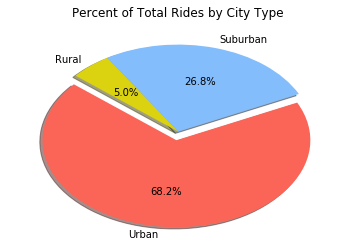

In [39]:
# use initial data table to calculate percents for each city type
totalRides = cityRideDf['ride_id'].sum()
typeRides = cityRideDf.groupby('type')['ride_id'].sum()
uPercent2 = (typeRides.loc['Urban'] / totalRides) * 100
sPercent2 = (typeRides.loc['Suburban'] / totalRides) * 100
rPercent2 = (typeRides.loc['Rural'] / totalRides) * 100

# Create pie Chart
labels = 'Urban', 'Suburban', 'Rural'
sizes = [uPercent2, sPercent2, rPercent2]
colors = ['#fb6557', '#83bdfc', '#dbd310']
explode = (0.1, 0, 0)  # explode 1st slice
 
# Plot pie chart - - reference: https://pythonspot.com/tag/pie-chart/
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors, shadow=True, startangle=140)
plt.title('Percent of Total Rides by City Type')
# save figure
plt.savefig('TotalRidesPie.png', bbox_inches='tight')

### Total Drivers by City Type

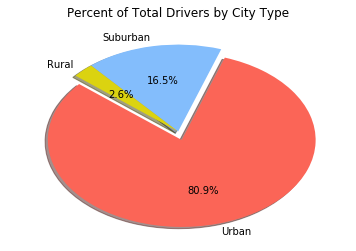

In [54]:
# use initial data table to calculate percents for each city type
totalDrivers = (cityRideDf.groupby("city")['driver_count'].mean()).sum()
typeDrivers = cityRideDf.groupby(['type', 'city'])['driver_count'].mean()
uPercent3 = (typeDrivers.loc['Urban'].sum() / totalDrivers) * 100
sPercent3 = (typeDrivers.loc['Suburban'].sum() / totalDrivers) * 100
rPercent3 = (typeDrivers.loc['Rural'].sum() / totalDrivers) * 100

# Create pie Chart
labels = 'Urban', 'Suburban', 'Rural'
sizes = [uPercent3, sPercent3, rPercent3]
colors = ['#fb6557', '#83bdfc', '#dbd310']
explode = (0.1, 0, 0) 
 
# Plot pie chart - - reference: https://pythonspot.com/tag/pie-chart/
plt.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', colors=colors, shadow=True, startangle=140)
plt.title('Percent of Total Drivers by City Type')
# save figure
plt.savefig('TotalDriversPie.png', bbox_inches='tight')